# Model skill assessment

## Simple comparison

Sometimes all your need is a simple comparison of two time series. The `fmskill.compare()` method does just that.

In [1]:
from mikeio import Dfs0
import fmskill

### The model
Can be either a dfs0 or a DataFrame. It needs to have a single item only. 

In [2]:
fn_mod = 'data/SW/ts_storm_4.dfs0'
df_mod = Dfs0(fn_mod).read(items=0).to_dataframe()

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. It needs to have a single item only.

In [3]:
fn_obs = 'data/SW/eur_Hm0.dfs0'

### compare()
The compare() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

In [4]:
c = fmskill.compare(fn_obs, df_mod)

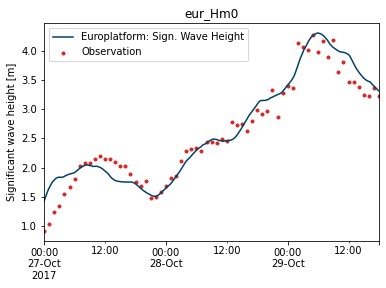

In [5]:
c.plot_timeseries();

In [6]:
c.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.081499,0.929767


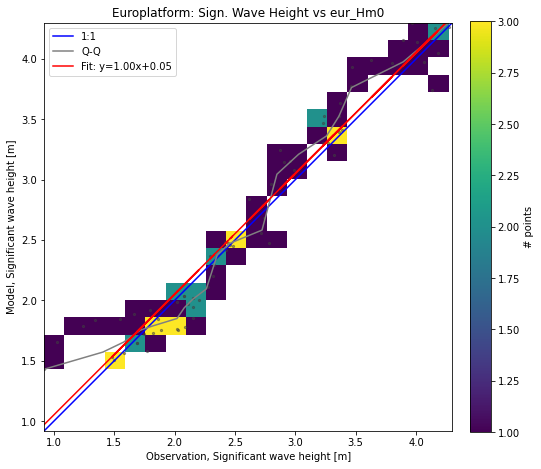

In [7]:
c.scatter()

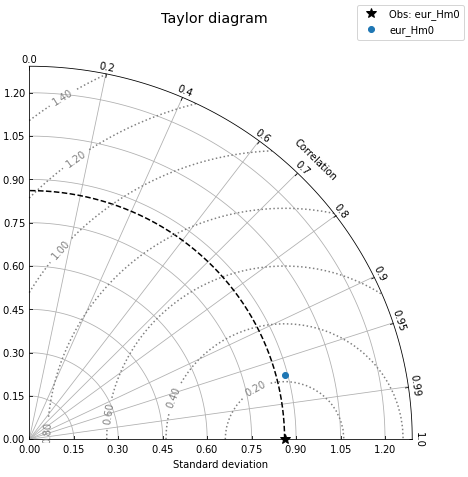

In [8]:
c.taylor()

## Elaborate comparison

In [9]:
import numpy as np
from fmskill import PointObservation
from fmskill import ModelResult, Connector

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
%matplotlib inline 

In [10]:
fn = 'data/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn, name='HKZN_local', item=0)
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Number of items: 15
Time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [11]:
o1 = PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

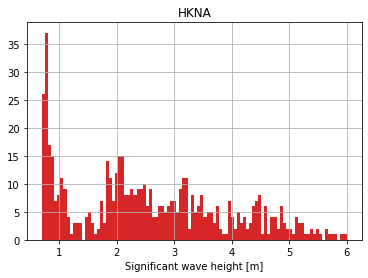

In [12]:
o1.hist();

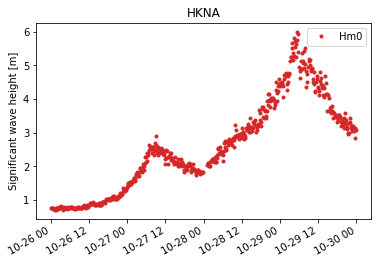

In [13]:
o1.plot(); 

### Connecting

In [ ]:
con = Connector([o1, o2, o3], mr)
con.observations

In [ ]:
con.plot_observation_positions();

In [ ]:
cc = con.extract()
cc

In [ ]:
cc.skill().style(precision=2)

In [ ]:
cc["c2"].skill(metrics="mean_absolute_error")

In [ ]:
cc["HKNA"].plot_timeseries(figsize=(10,5));

In [ ]:
cc["EPL"].scatter(figsize=(8,8), show_hist=True) #, ylim=[2,8], xlim=[1,10])

In [ ]:
cc["c2"].hist(bins=20)

In [ ]:
cc["HKNA"].scatter(binsize=0.25, cmap="viridis")

In [ ]:
con.plot_temporal_coverage();